# Estudo de COMPRA de fundos imobiliários
#### O objetivo é criar uma carteira diversificada de FI's com objetivo de: 
###### i. risco mínimo
###### ii. valorização

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import random as rdm
import statsmodels as mld

In [3]:
import decimal
from decimal import Decimal

In [4]:
decimal.getcontext()

Context(prec=28, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])

In [5]:
decimal.getcontext(). prec = 50

In [6]:
tickers = ['HSML11.SA', 'HGRU11.SA', 'BRCR11.SA','MGFF11.SA', 'RBRF11.SA', 'ALZR11.SA', 'HGLG11.SA', 'XPLG11.SA', 'VRTA11.SA', 'XPML11.SA', 'HGRE11.SA']
 
df_FI = pd.DataFrame()
    
for t in tickers:
    df_FI[t] = web.DataReader(t, data_source= 'yahoo', start = '2019-1-1') ['Adj Close']
    

In [7]:
# conferencia dos dados
df_FI.head()

,HSML11.SA,HGRU11.SA,BRCR11.SA,MGFF11.SA,RBRF11.SA,ALZR11.SA,HGLG11.SA,XPLG11.SA,VRTA11.SA,XPML11.SA,HGRE11.SA
Date,,,,,,,,,,,
2019-08-16,102.099998,112.900002,96.199997,98.500000,104.230003,106.300003,NaN,106.250000,123.389999,111.739998,163.800003
2019-08-19,103.099998,112.209999,96.169998,98.500000,104.300003,105.760002,NaN,106.000000,124.349998,111.639999,159.520004
2019-08-20,102.730003,113.059998,96.099998,98.900002,104.000000,105.500000,NaN,106.000000,124.199997,111.339996,156.490005
2019-08-21,103.000000,113.699997,95.500000,98.199997,104.000000,105.699997,NaN,105.760002,124.199997,111.110001,153.149994
2019-08-22,102.610001,113.000000,95.480003,98.400002,104.459999,105.599998,NaN,106.080002,124.290001,111.690002,152.050003


In [8]:
df_fi = df_FI.dropna()

In [9]:
df_fi.corr()

,HSML11.SA,HGRU11.SA,BRCR11.SA,MGFF11.SA,RBRF11.SA,ALZR11.SA,HGLG11.SA,XPLG11.SA,VRTA11.SA,XPML11.SA,HGRE11.SA
HSML11.SA,1.000000,0.905440,0.962777,0.658133,0.949031,0.948534,0.930763,0.928182,0.909371,0.890364,0.882285
HGRU11.SA,0.905440,1.000000,0.835967,0.594633,0.806618,0.856813,0.908921,0.926872,0.781145,0.849561,0.707436
BRCR11.SA,0.962777,0.835967,1.000000,0.718690,0.981103,0.970485,0.915035,0.879227,0.962987,0.905125,0.932410
MGFF11.SA,0.658133,0.594633,0.718690,1.000000,0.719288,0.766263,0.801775,0.782913,0.805361,0.800070,0.636313
RBRF11.SA,0.949031,0.806618,0.981103,0.719288,1.000000,0.963734,0.904008,0.873290,0.952893,0.907762,0.918545
ALZR11.SA,0.948534,0.856813,0.970485,0.766263,0.963734,1.000000,0.960112,0.929113,0.963483,0.940897,0.909538
HGLG11.SA,0.930763,0.908921,0.915035,0.801775,0.904008,0.960112,1.000000,0.978107,0.913247,0.927209,0.832584
XPLG11.SA,0.928182,0.926872,0.879227,0.782913,0.873290,0.929113,0.978107,1.000000,0.872016,0.924611,0.777092
VRTA11.SA,0.909371,0.781145,0.962987,0.805361,0.952893,0.963483,0.913247,0.872016,1.000000,0.921735,0.926896
XPML11.SA,0.890364,0.849561,0.905125,0.800070,0.907762,0.940897,0.927209,0.924611,0.921735,1.000000,0.860979


In [10]:
df_FI.describe()

,HSML11.SA,HGRU11.SA,BRCR11.SA,MGFF11.SA,RBRF11.SA,ALZR11.SA,HGLG11.SA,XPLG11.SA,VRTA11.SA,XPML11.SA,HGRE11.SA
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,84.000000,107.000000,107.000000,107.000000,107.000000
mean,108.508224,121.825701,98.880841,110.622523,111.640935,115.696542,175.931309,118.745234,128.705327,122.602430,171.261495
std,8.190491,10.190596,9.828539,8.979284,9.782837,12.391921,18.363399,15.146545,6.711927,10.992321,17.039272
min,101.500000,111.980003,90.000000,98.199997,103.800003,104.489998,153.449997,101.750000,120.419998,110.610001,147.199997
25%,102.800003,113.500000,92.049999,103.049999,104.970001,105.919998,159.857506,106.000000,123.750000,112.380001,159.195000
50%,103.980003,114.900002,93.910004,107.010002,107.750000,111.779999,173.794998,109.290001,127.480003,120.000000,167.300003
75%,113.500000,134.245003,102.355000,118.049999,114.049999,122.329998,193.049995,131.900002,129.995003,130.445000,177.400002
max,125.959999,140.000000,124.000000,132.990005,138.699997,148.990005,221.139999,149.979996,146.300003,147.000000,213.360001


In [11]:
# dados iniciados em meados de setembro
log_return = np.log(df_fi/df_fi.shift(1))

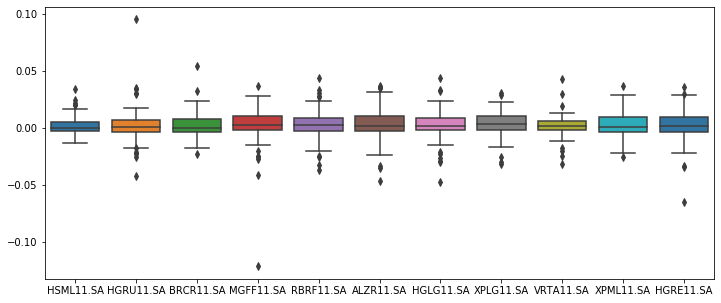

In [12]:
plt.figure(figsize=(12,5))
sns.boxplot(data=log_return, palette='tab10')

In [13]:
log_return.mean()*75

HSML11.SA    0.146636
HGRU11.SA    0.158420
BRCR11.SA    0.217890
MGFF11.SA    0.137545
RBRF11.SA    0.208975
ALZR11.SA    0.184581
HGLG11.SA    0.170170
XPLG11.SA    0.264228
VRTA11.SA    0.109989
XPML11.SA    0.212797
HGRE11.SA    0.203070
dtype: float64

In [14]:
log_return.std()

HSML11.SA    0.008405
HGRU11.SA    0.016474
BRCR11.SA    0.010958
MGFF11.SA    0.018795
RBRF11.SA    0.013326
ALZR11.SA    0.015008
HGLG11.SA    0.013132
XPLG11.SA    0.011319
VRTA11.SA    0.009829
XPML11.SA    0.011518
HGRE11.SA    0.015038
dtype: float64

# Trocar ativos aqui

In [15]:
# selecionados 'HSML11.SA', 'MGFF11.SA', 'HGRU11.SA' (menor risco)
# selecionados 'XPLG11.SA', 'MGFF11.SA', 'BRCR11.SA' (maior retorno)

df_carteira = pd.DataFrame()

df_carteira = df_fi.loc[:,['XPLG11.SA','MGFF11.SA', 'BRCR11.SA']]  

In [16]:
log_carteira = np.log(df_carteira/df_carteira.shift(1))


In [17]:
# selecionados 'HSML11.SA', 'MGFF11.SA', 'HGRU11.SA'
# selecionados 'XPLG11.SA', 'MGFF11.SA', 'BRCR11.SA'
a1_var = log_carteira['XPLG11.SA'].var()
a2_var = log_carteira['MGFF11.SA'].var()
a3_var = log_carteira['BRCR11.SA'].var()

In [18]:
# por período
a1_var_p= log_carteira['XPLG11.SA'].var()*75
a2_var_p= log_carteira['MGFF11.SA'].var()*75
a3_var_p= log_carteira['BRCR11.SA'].var()*75

In [19]:
cov_matrix = log_carteira.cov()

In [20]:
cov_matrix_p = log_carteira.cov()*75

In [21]:
corr_matrix = log_carteira.corr()

# Peso dos ativos

In [22]:
# peso do investimento 

peso = np.array([0.3,0.4,0.3])

In [23]:
carteira_var = np.dot(peso.T, np.dot(cov_matrix_p,peso))
carteira_var**0.5

0.0884104903799497

In [24]:
print( 'O risco da carteira é '+ str(round(carteira_var**0.5,5)*100)+ ' %')

O risco da carteira é 8.841000000000001 %


In [25]:
df_carteira.iloc[0]

XPLG11.SA    101.750000
MGFF11.SA    102.000000
BRCR11.SA     92.449997
Name: 2019-09-18 00:00:00, dtype: float64

### Normalizando retornos

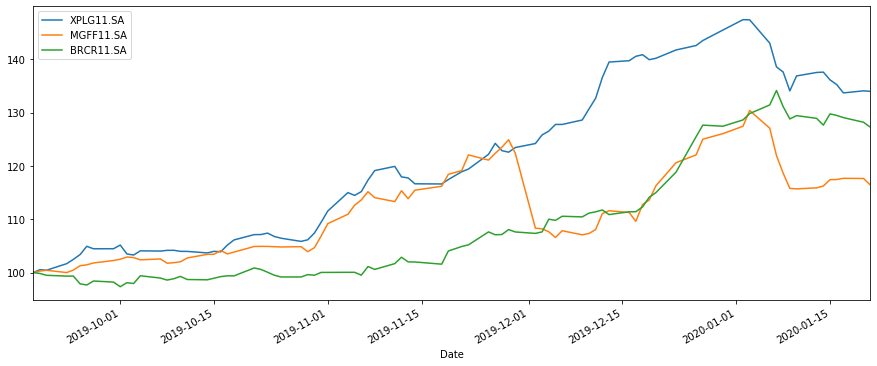

In [26]:
( df_carteira/ df_carteira.iloc[0] * 100).plot(figsize= (15,6))

In [27]:
np.dot(log_carteira.mean() * 75 ,peso)

0.19965327688657858

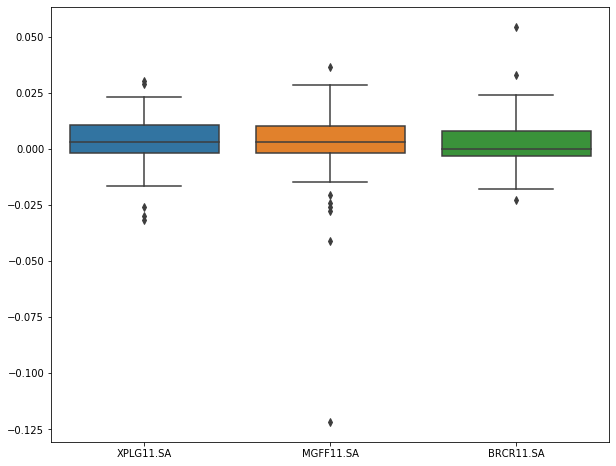

In [28]:
plt.figure(figsize=(10,8))
sns.boxplot(data = log_carteira)

In [29]:
print(('A carteira possui retorno esperado de ' + str(round(np.dot(log_carteira.mean() * 75 ,peso),5)*100)+' %') + ( ' e risco de '+ str(round(carteira_var**0.5,5)*100)+ ' %'))

A carteira possui retorno esperado de 19.965 % e risco de 8.841000000000001 %


In [30]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates


## Fazendo gráfico de vela

In [31]:
# Código que coloca o intervalo de tempo a ser analisado ('Y', '5Y','M','W', 'B', 'BM', 'SMS', 'Q', 'BQ', 'H', 'S', 'BH')

XPLG = web.DataReader('XPLG11.SA', data_source='yahoo', start= '2019-1-1')

time_grouper = 'W'
tmp_open = XPLG.groupby(
    pd.Grouper( freq = time_grouper))['Adj Close'].nth([0])
tmp_close = XPLG.groupby(
    pd.Grouper(freq = time_grouper))['Adj Close'].nth([-1])
XPLG = XPLG.groupby(
    pd.Grouper(freq = time_grouper))['Adj Close'].agg(
    {'Low' : np.min , 'High' : np.max }).reset_index()
XPLG['Open'] = tmp_open.values
XPLG['Close'] = tmp_close.values

XPLG = XPLG[['Date','Open', 'High', 'Low', 'Close']]

# Convertendo data em float

XPLG["Date"] = XPLG["Date"].apply(mdates.date2num)

XPLG.tail()

C:\Users\ADM\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if sys.path[0] == '':


,Date,Open,High,Low,Close
51,737422.0,144.199997,146.000000,144.199997,146.000000
52,737429.0,148.000000,149.979996,148.000000,149.949997
53,737436.0,145.500000,145.500000,136.399994,139.250000
54,737443.0,139.910004,139.979996,136.009995,136.009995
55,737450.0,136.410004,136.410004,136.309998,136.309998


In [32]:
MGFF = web.DataReader('MGFF11.SA', data_source='yahoo', start= '2019-1-1')

time_grouper = 'W'
tmp_open = MGFF.groupby(
    pd.Grouper( freq = time_grouper))['Adj Close'].nth([0])
tmp_close = MGFF.groupby(
    pd.Grouper(freq = time_grouper))['Adj Close'].nth([-1])
MGFF = MGFF.groupby(
    pd.Grouper(freq = time_grouper))['Adj Close'].agg(
    {'Low' : np.min , 'High' : np.max }).reset_index()
MGFF['Open'] = tmp_open.values
MGFF['Close'] = tmp_close.values

MGFF = MGFF[['Date','Open', 'High', 'Low', 'Close']]

# Convertendo data em float

MGFF["Date"] = MGFF["Date"].apply(mdates.date2num)

MGFF.tail()

C:\Users\ADM\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.


,Date,Open,High,Low,Close
51,737422.0,123.000000,127.500000,123.000000,127.500000
52,737429.0,128.559998,132.990005,128.559998,132.990005
53,737436.0,129.600006,129.600006,118.000000,118.000000
54,737443.0,118.199997,120.019997,118.199997,120.019997
55,737450.0,119.989998,119.989998,118.790001,118.790001


In [33]:
BRCR = web.DataReader('BRCR11.SA', data_source='yahoo', start= '2019-1-1')

time_grouper = 'W'
tmp_open = BRCR.groupby(
    pd.Grouper( freq = time_grouper))['Adj Close'].nth([0])
tmp_close = BRCR.groupby(
    pd.Grouper(freq = time_grouper))['Adj Close'].nth([-1])
BRCR = BRCR.groupby(
    pd.Grouper(freq = time_grouper))['Adj Close'].agg(
    {'Low' : np.min , 'High' : np.max }).reset_index()
BRCR['Open'] = tmp_open.values
BRCR['Close'] = tmp_close.values

BRCR = BRCR[['Date','Open', 'High', 'Low', 'Close']]

# Convertendo data em float

BRCR["Date"] = BRCR["Date"].apply(mdates.date2num)

BRCR.tail()

C:\Users\ADM\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  # Remove the CWD from sys.path while we load stuff.


,Date,Open,High,Low,Close
51,737422.0,109.849998,118.000000,109.849998,118.000000
52,737429.0,117.809998,120.000000,117.809998,120.000000
53,737436.0,121.500000,124.000000,119.070000,119.650002
54,737443.0,119.169998,119.949997,118.000000,119.300003
55,737450.0,118.500000,118.500000,117.660004,117.660004


In [34]:
import matplotlib as mpl
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc
from matplotlib import style
mpl.style.use('default')

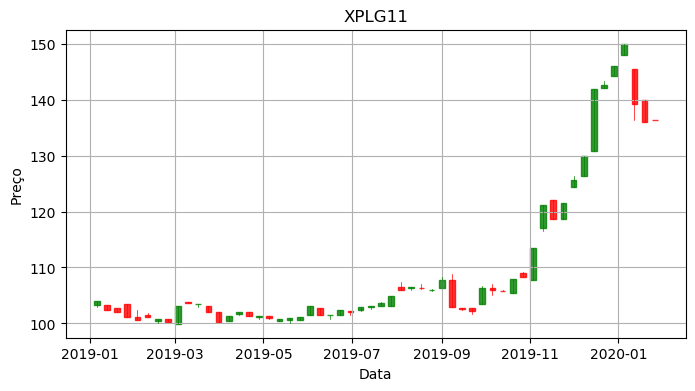

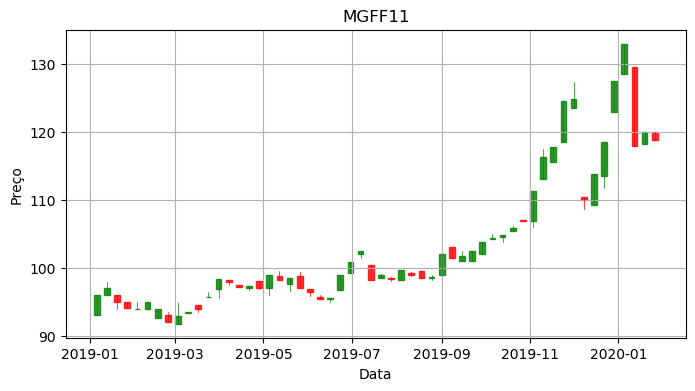

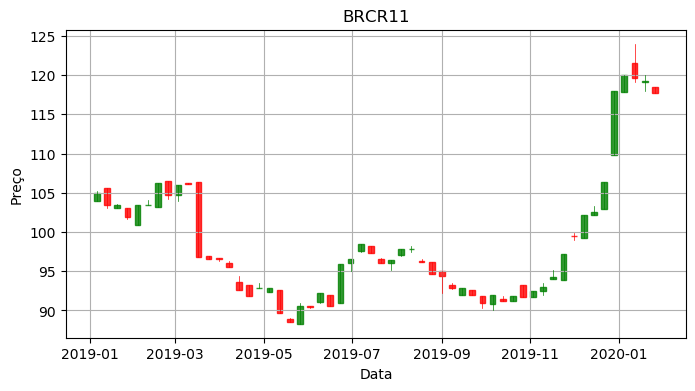

In [35]:
# XPLG

fig, ax = plt.subplots(figsize=(8,4))

ax.xaxis_date()
plt.xlabel('Date')

candlestick_ohlc(ax, XPLG.values, width= 4, colorup = 'g', colordown = 'r', alpha =0.8)
plt.grid()
plt.title('XPLG11')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

# MGFF

fig, ax = plt.subplots(figsize=(8,4))

ax.xaxis_date()
plt.xlabel('Date')

candlestick_ohlc(ax, MGFF.values, width= 4, colorup = 'g', colordown = 'r', alpha =0.8)
plt.grid()
plt.title('MGFF11')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

# BRCR

fig, ax = plt.subplots(figsize=(8,4))

ax.xaxis_date()
plt.xlabel('Date')

candlestick_ohlc(ax, BRCR.values, width= 4, colorup = 'g', colordown = 'r', alpha =0.8)
plt.grid()
plt.title('BRCR11')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()



